In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
data_cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
(data[data_cols]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
from numpy import nan
data[data_cols]=data[data_cols].replace(0, nan)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

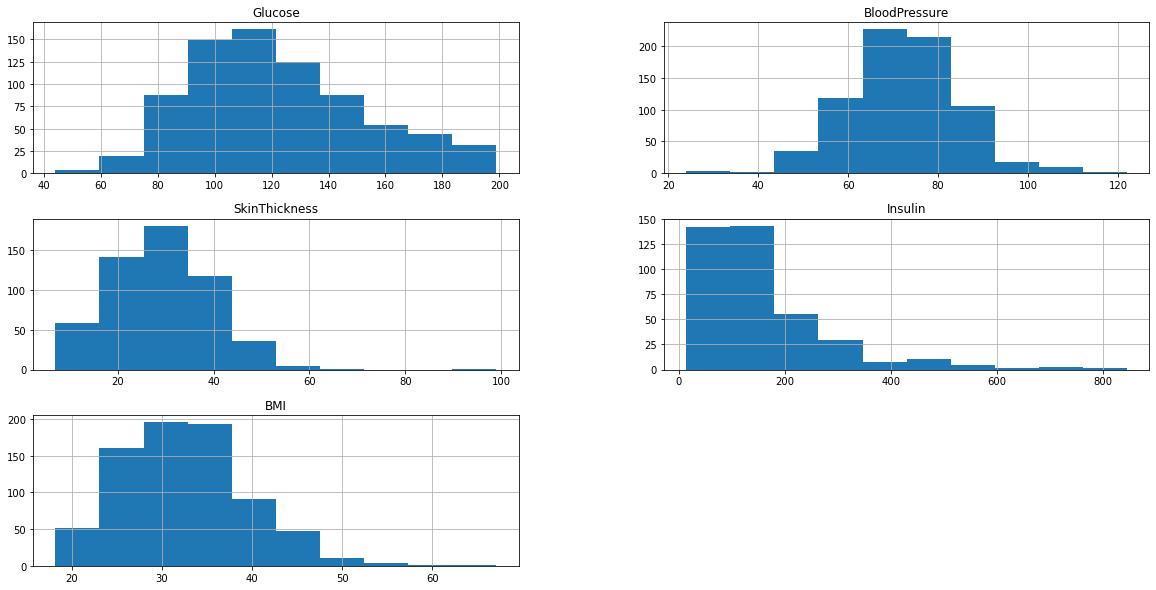

In [10]:
data[data_cols].hist(figsize=(20,10))

In [11]:
mean_val=data[data_cols].mean()
mean_val

Glucose          121.686763
BloodPressure     72.405184
SkinThickness     29.153420
Insulin          155.548223
BMI               32.457464
dtype: float64

In [12]:
median_val=data[data_cols].median()
median_val

Glucose          117.0
BloodPressure     72.0
SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: float64

In [13]:
for col in data_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [16]:
data['Outcome']=data['Outcome'].astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 49.0 KB


In [18]:
data.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [19]:
num_obs=len(data)
num_true=len(data.loc[data['Outcome']==1])
num_false=len(data.loc[data['Outcome']==0])
print("Number of True outcomes:{0}({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Number of False outcomes:{0}({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Number of True outcomes:268(34.90%)
Number of False outcomes:500(65.10%)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

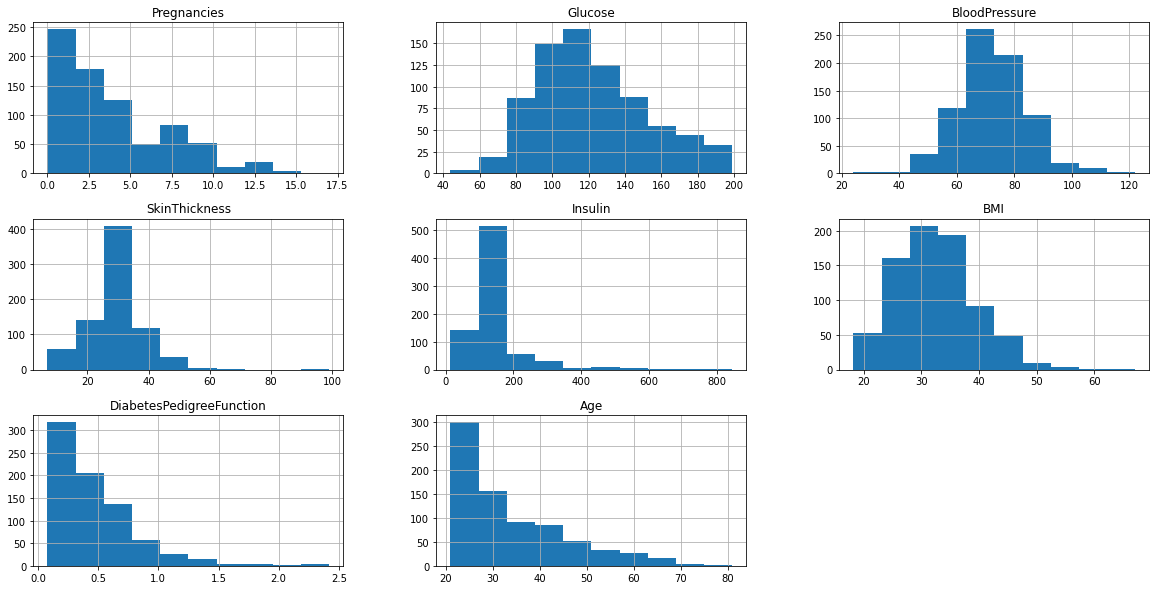

In [21]:
data.hist(figsize=(20,10))

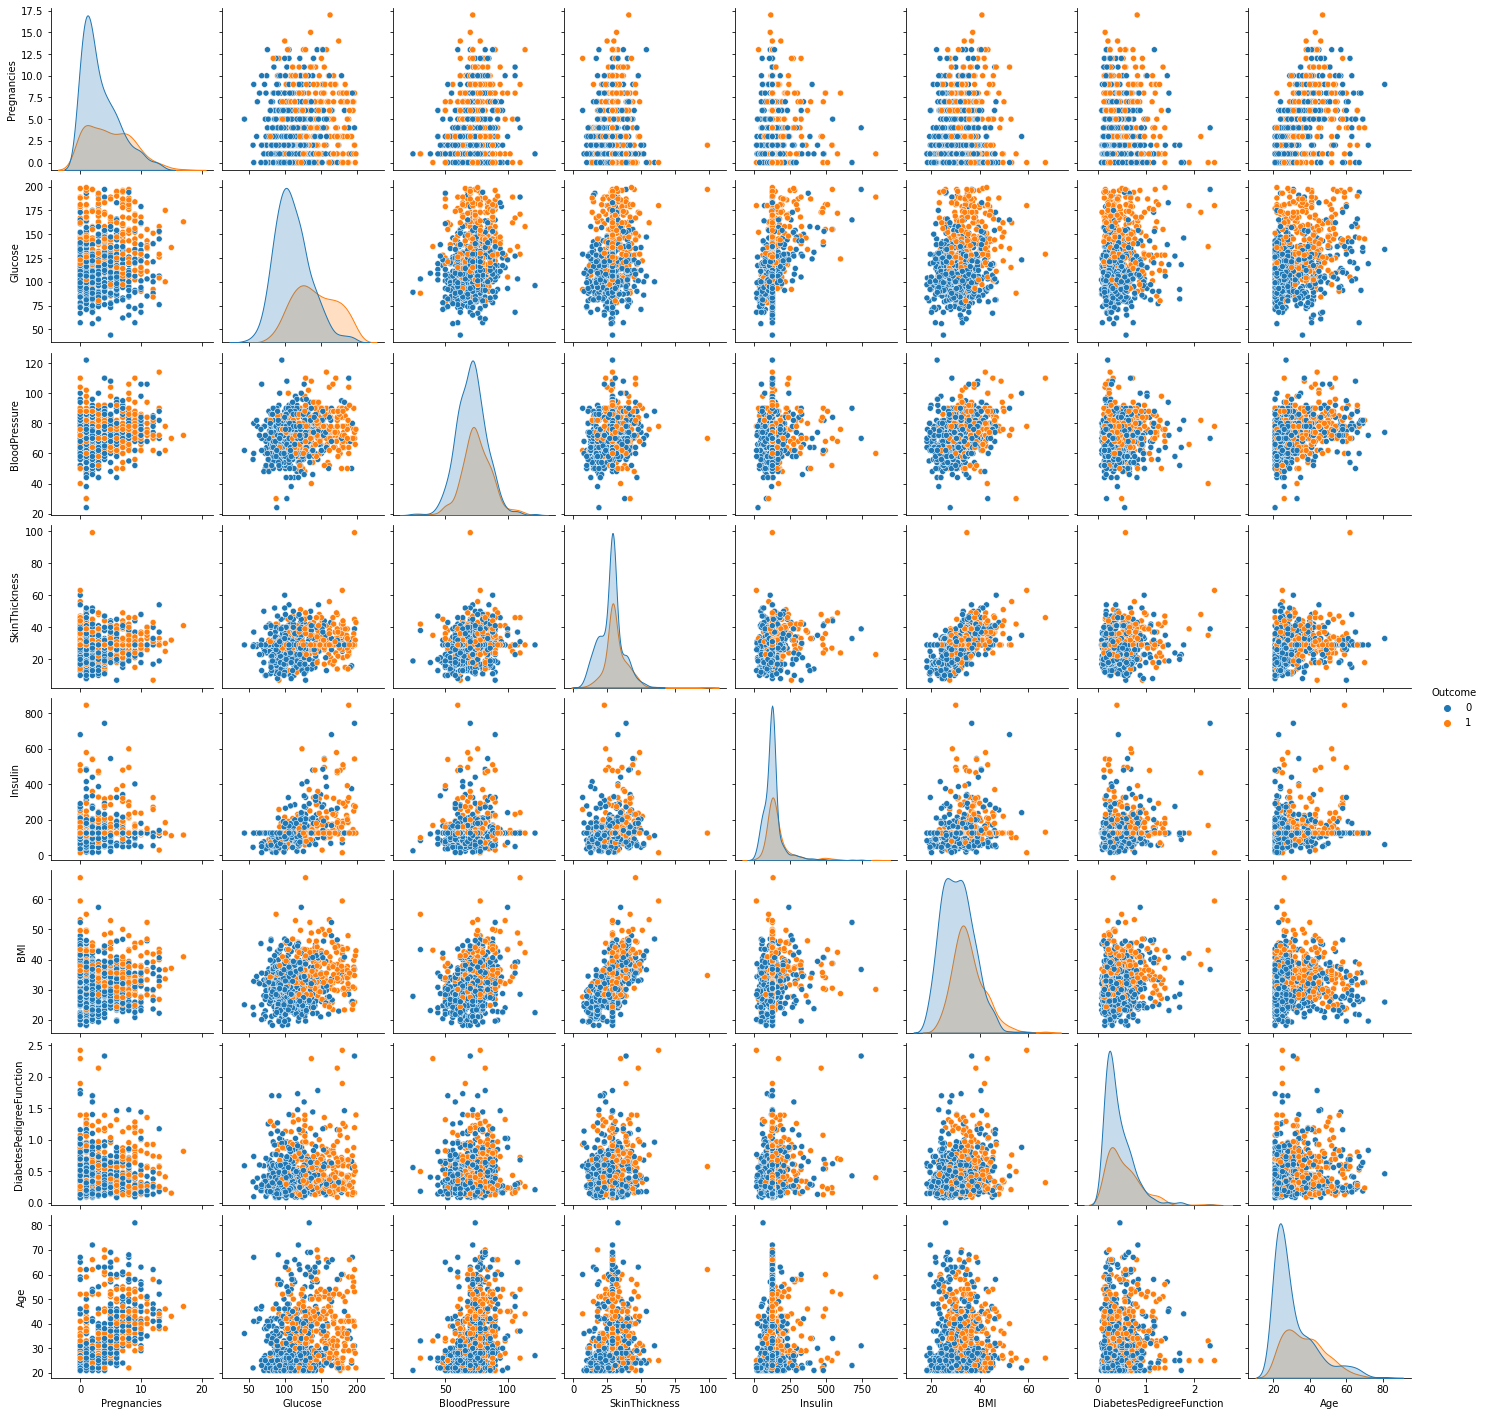

In [22]:
sns.pairplot(data,hue='Outcome')
plt.show()

In [23]:
num_f=data.select_dtypes(include='number')
col_names=num_f.columns

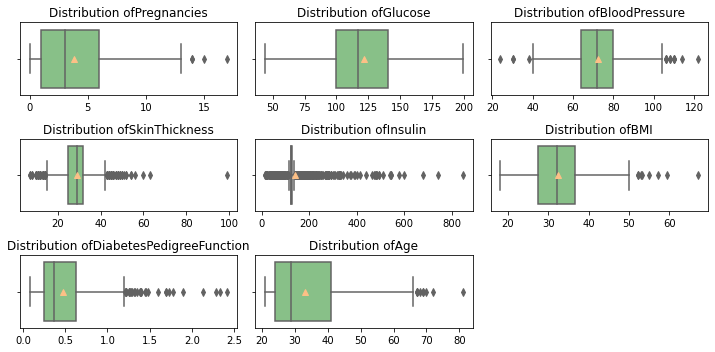

In [27]:
fig=plt.figure(1, (10,5))
sns.set_palette(sns.color_palette("Accent"))
for i,cont in enumerate(col_names):
    ax=plt.subplot(3,3,i+1)
    sns.boxplot(data=data,x=data[cont],showmeans=True)
    ax.set_title(f"Distribution of{cont}")
    ax.set_xlabel("")
plt.tight_layout()


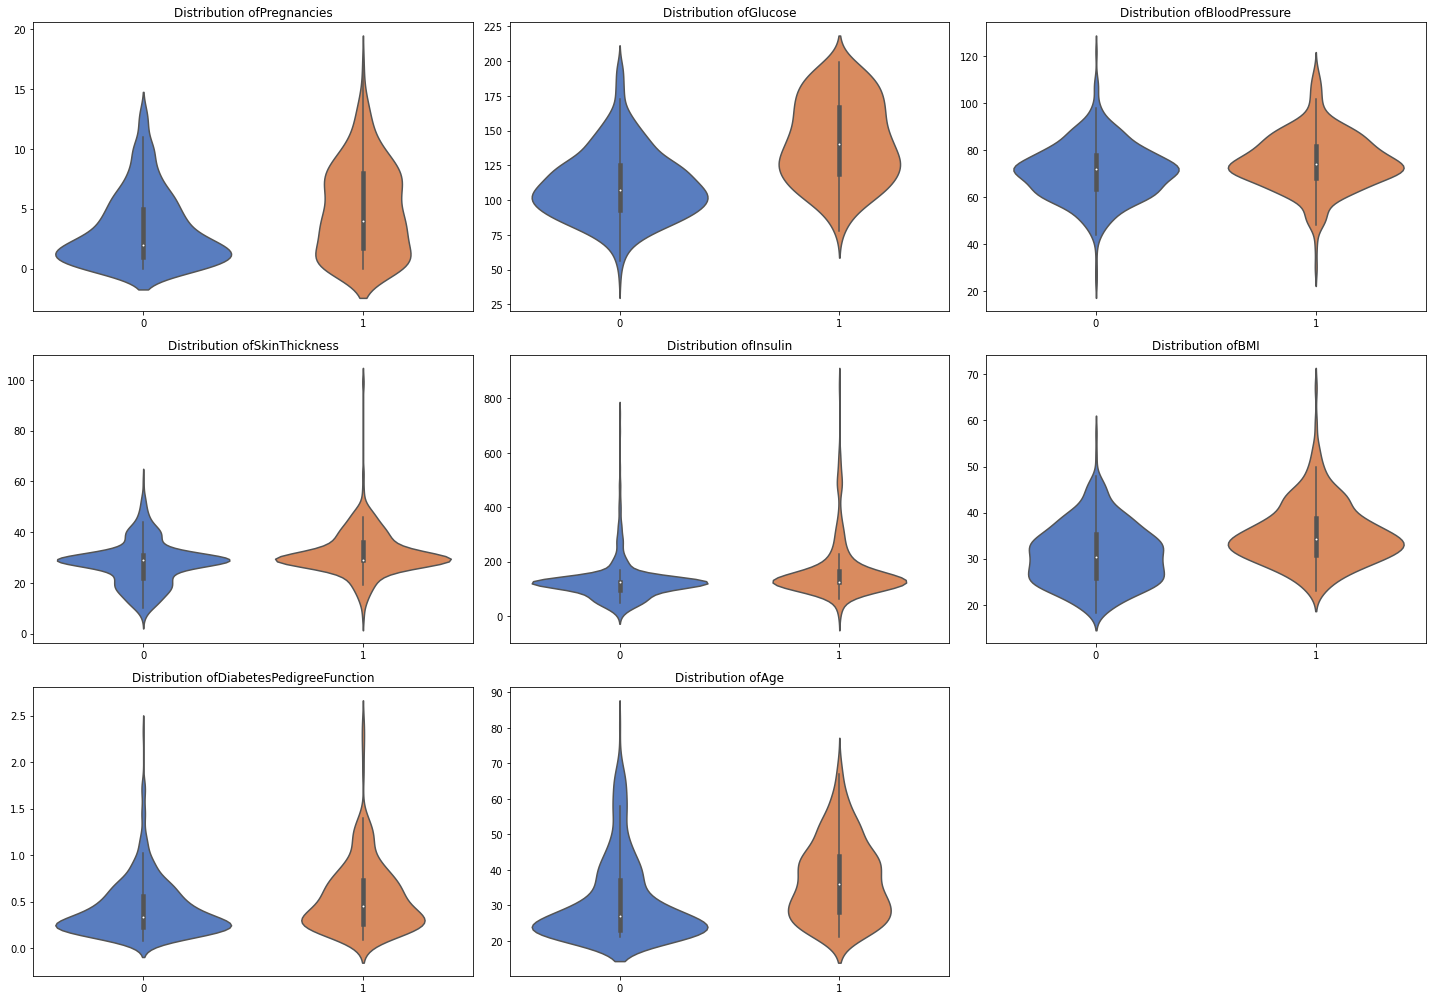

In [29]:
fig=plt.figure(1, (20,14))
sns.set_palette(sns.color_palette("Accent"))
for i,cont in enumerate(col_names):
    ax=plt.subplot(3,3,i+1)
    sns.violinplot(x="Outcome", y=cont, data=data, palette="muted", split=True)
    ax.set_title(f"Distribution of{cont}")
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()

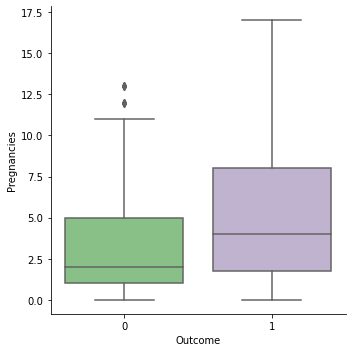

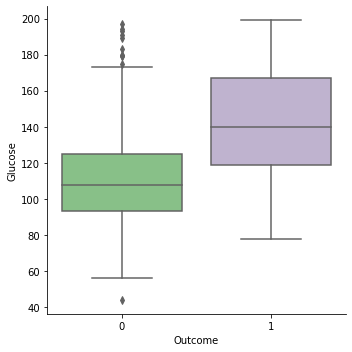

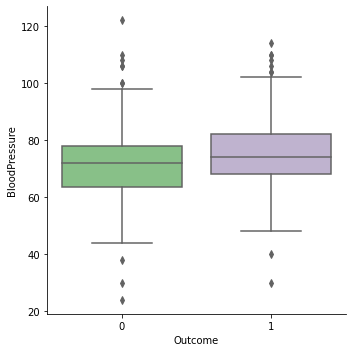

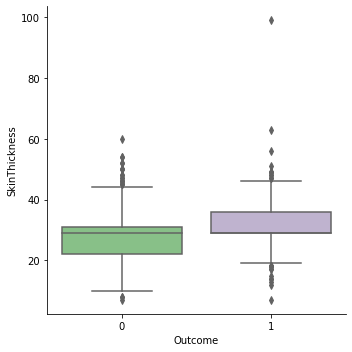

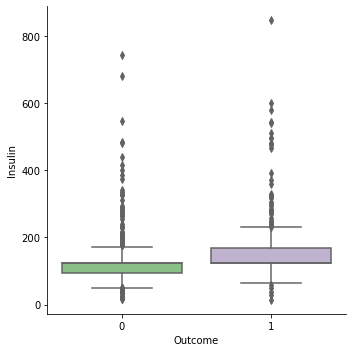

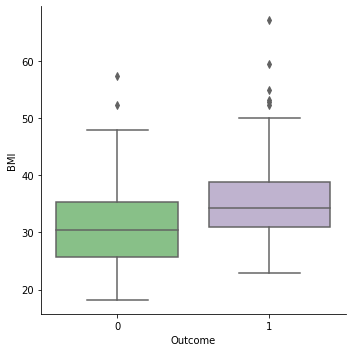

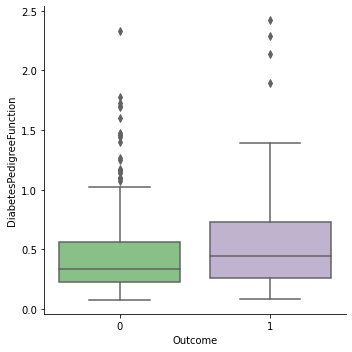

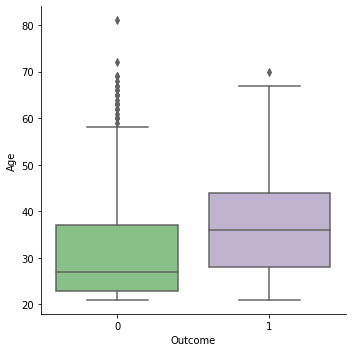

In [30]:
for i,col in enumerate(data.columns[:-1]):
    sns.catplot(x='Outcome', y=col, data=data,kind="box")
    plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

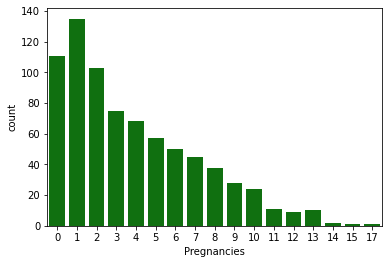

In [31]:
sns.countplot(x="Pregnancies",data=data, color='green')

There are outliers present in this column as can be seen from the plot. Other column also hasoutliers.  We can replace these outliers by their median values for the columns:  Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin and BMI. To identify outliers, we are using theformula **Q3+ 1.5*IQR**, and then replacing any data above this value with the median valuefor the given column.

In [33]:
Q1=data.quantile(0.25)
Q2=data.quantile(0.75)
Q3=data.quantile(0.5)
IQR=Q2-Q1
Maximum=Q3+1.5*IQR
Maximum

Pregnancies                  10.50000
Glucose                     177.75000
BloodPressure                96.00000
SkinThickness                39.50000
Insulin                     133.62500
BMI                          45.95000
DiabetesPedigreeFunction      0.94625
Age                          54.50000
dtype: float64

In [34]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [35]:
for col in cols:
    data[col][data[col]>Maximum[col]]=data[col].median()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_29124/153870863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col]>Maximum[col]]=data[col].median()


The data no longer has any outliers. We can now proceed to normalise the data.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(data.iloc[: , :-1]), columns=data.columns[:-1])

In [37]:
scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.911204,1.259782,0.040727,1.264585,0.482831,0.290175,0.468492,1.425995
1,-0.863148,-1.291953,-0.512868,0.287849,0.482831,-0.882390,-0.365061,-0.190672
2,1.620945,0.004166,-0.697399,0.287849,0.482831,-1.435170,0.604397,-0.105584
3,-0.863148,-1.129938,-0.512868,-0.688887,-0.742282,-0.631126,-0.920763,-1.041549
4,-1.218019,0.814241,-2.911776,1.264585,0.482831,1.881513,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,2.330686,-0.643893,0.409790,0.287849,0.482831,0.172918,-0.908682,2.532136
764,-0.508278,0.206685,-0.143805,-0.037730,0.482831,0.826204,-0.398282,-0.531023
765,0.556333,0.166181,0.040727,-0.688887,-0.030926,-0.949394,-0.685193,-0.275760
766,-0.863148,0.368700,-1.066462,0.287849,0.482831,-0.296107,-0.371101,1.170732


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

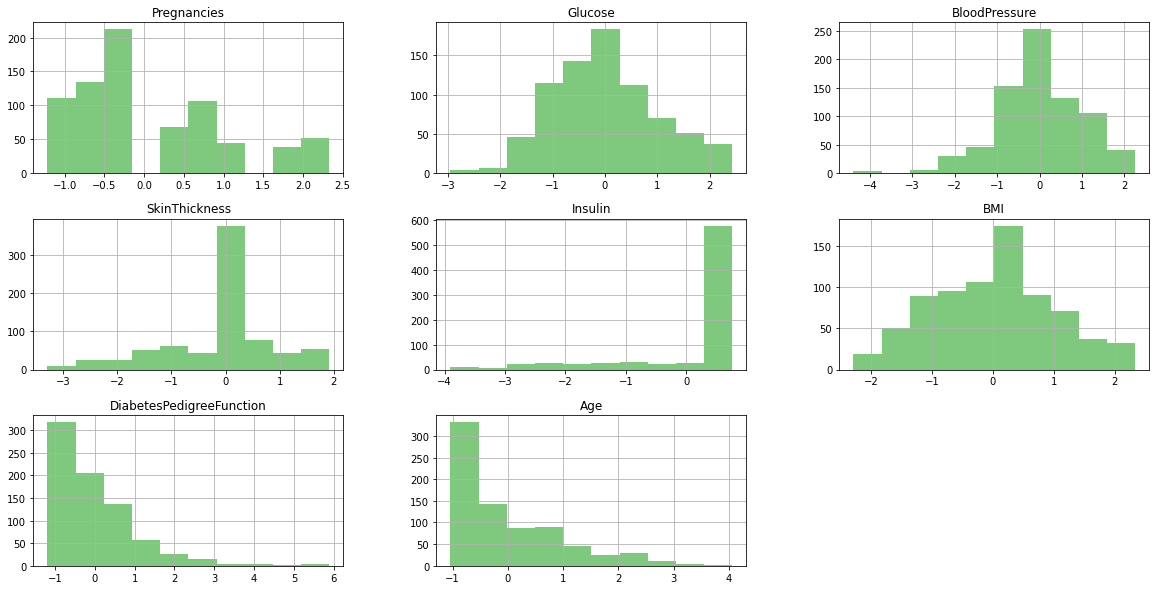

In [38]:
scaled.hist(figsize=(20,10))